<a href="https://colab.research.google.com/github/JayantJharkhande3000/Bias-and-Regression/blob/master/Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install, Import and Login

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import OneHotEncoder


# Download and prepare the Dataset.

In [ ]:
image_data = tf.keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels),(test_images, test_labels) = image_data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


# Converting image data of X train and Test to array

In [ ]:
#Each image has Intensity from 0 to 255
train_images = train_images/255 
# here we normalize the training data
test_images = test_images/255
# here we normalize the test data
#we must change the shape of the images to 1d array(28*28)
#for multipication 1*784
num_pixels = 784
train_images = train_images.reshape(train_images.shape[0],num_pixels)
test_images = test_images.reshape(test_images.shape[0],num_pixels)
X_test = np.array(test_images.T)
X_train = np.array(train_images.T)
print("X test",X_test.shape)
print("X train",X_train.shape)

X test (784, 10000)
X train (784, 60000)


# Converting categorical data of Y train and Test to one hot encoding. 

Train labels onehot encoding

In [ ]:
one_hot_encoder = OneHotEncoder(sparse = False)
encoded = train_labels.reshape(len(train_labels),1)
# converting individual array so it create a shape of (42000 , 1)
# 42000 individual array
trainlabels = one_hot_encoder.fit_transform(encoded)
# fit transform converts categorical labels to one hot encoded vector 
Y_train = trainlabels.astype(np.uint8)
# converting the labels with specific data type
Y_train = np.array(Y_train.T)
print("Y_train ",Y_train.shape)

Y_train  (10, 60000)


Test labels onehot encoding

In [ ]:
one_hot_encoder = OneHotEncoder(sparse = False)
encoded = test_labels.reshape(len(test_labels),1)
# converting individual array so it create a shape of (42000 , 1)
# 42000 individual array
testlabels = one_hot_encoder.fit_transform(encoded)
# fit transform converts categorical labels to one hot encoded vector 
Y_test = testlabels.astype(np.uint8)
# converting the labels with specific data type
Y_test = np.array(Y_test.T)
print("Y_test ",Y_test.shape)

Y_test  (10, 10000)


Input data shapes

In [ ]:
print("X train",X_train.shape)
print("Y_train ",Y_train.shape)
print("X test",X_test.shape)
print("Y_test ",Y_test.shape)


X train (784, 60000)
Y_train  (10, 60000)
X test (784, 10000)
Y_test  (10, 10000)


Image Display for training data set

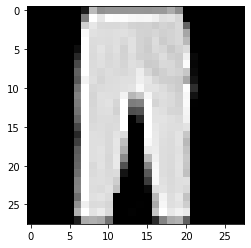

[0 1 0 0 0 0 0 0 0 0]


In [ ]:
# Displaying the image from the training set data
index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:, index].reshape(28, 28), cmap = 'gray')
plt.show()
print(Y_train[:,index])

# Activation function 
* tanh
* ReLU

In [ ]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)


* SoftMax function 


In [ ]:
def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

Derivative of Activation function 


In [ ]:
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

# Initializing the parameter

In [ ]:
def initialize_parameters(n_x, n_h_1, n_h_2, n_h_3, n_y):
  print("input layer neurons: ", n_x)
  print("first hidden layer neurons: ", n_h_1)
  print("second hidden layer neurons: ", n_h_2)
  print("third hidden layer neurons: ", n_h_3)
  print("last output layer neurons: ", n_y)
  # n_x is the neuron in the input Layer which is 784
  # n_h is the  neuron in the hidden Layer
  # n_y is the neuron in the Output Layer 
  # weights for 1st layer / for input layer 
  weight0 = np.random.randn(n_h_1, n_x)*0.1
  # array of n_h X n_x 
  # we have multiplied with the 0.01 so that we can reduce the value 
  # bias for 1st layer
  bias0 = np.zeros((n_h_1, 1))
    
  # same for hidden layer  
  weight1 = np.random.randn(n_h_2, n_h_1)*0.1
  bias1 = np.zeros((n_h_2, 1))
  
  # same for hidden layer  
  weight2 = np.random.randn(n_h_3, n_h_2)*0.1
  bias2 = np.zeros((n_h_3, 1))
  
  # same for hidden layer  
  weight3 = np.random.randn(n_y, n_h_3)*0.1
  bias3 = np.zeros((n_y, 1))
  
  
  WB_parameters = {
        "weight0" : weight0,
        "bias0" : bias0,
        "weight1" : weight1,
        "bias1" : bias1,
        "weight2" : weight2,
        "bias2" : bias2,
        "weight3" : weight3,
        "bias3" : bias3
    }
  # here we store all the ouput parameter in a numpy dictionary   
    
  return WB_parameters

# Forward Propagation 

In [ ]:
def forward_propagation(x, WB_parameters):
    
    weight0 = WB_parameters['weight0']
    bias0 = WB_parameters['bias0']
    weight1 = WB_parameters['weight1']
    bias1 = WB_parameters['bias1']
    weight2 = WB_parameters['weight2']
    bias2 = WB_parameters['bias2']
    weight3 = WB_parameters['weight3']
    bias3 = WB_parameters['bias3']
    
    # preactivation function
    a0 = np.dot(weight0, x) + bias0
    # activation function
    h1 = tanh(a0)
    
    # preactivation function
    a1 = np.dot(weight1, h1) + bias1
    # activation function
    h2 = tanh(a1)
    
    # preactivation function
    a2 = np.dot(weight2, h2) + bias2
    # activation function
    h3 = tanh(a2)
    
    # preactivation function
    a3 = np.dot(weight3, h3) + bias3
    # activation function
    h4 = softmax(a3)
    
    
    # forward parameter dictionary
    forward_parameters = {
        "a0" : a0,
        "h1" : h1,
        "a1" : a1,
        "h2" : h2,
        "a2" : a2,
        "h3" : h3,
        "a3" : a3,
        "h4" : h4
    }
    
    return forward_parameters

# Cost Function 

In [ ]:
def cost_function(weight3 , weight2 , weight1, weight0, h4, y):
    m = y.shape[1]
    lambda_value = 0
    # regularization term
    ridge_reg_term = (lambda_value / 2 * m) *(np.sum(np.square(weight3)) + np.sum(np.square(weight2)) + np.sum(np.square(weight1)) +np.sum(np.square(weight0)) )
    cost = -(1/m)*np.sum(y*np.log(h4))
    cost_f = cost + ridge_reg_term 
    return cost_f

# Backpropagation for gradient

In [ ]:
def backward_prop(x, y, WB_parameters, forward_parameters):
    
    # extracting our parameter from initial weight and bias 
    m = y.shape[1]
    lambda_value = 0

    weight0 = WB_parameters['weight0']
    bias0 = WB_parameters['bias0']
    weight1 = WB_parameters['weight1']
    bias1 = WB_parameters['bias1']
    weight2 = WB_parameters['weight2']
    bias2 = WB_parameters['bias2']
    weight3 = WB_parameters['weight3']
    bias3 = WB_parameters['bias3']
    
    
    
    h1 = forward_parameters['h1']
    h2 = forward_parameters['h2']
    h3 = forward_parameters['h3']
    h4 = forward_parameters['h4']
    
    
    m = x.shape[1]
    
    

    # gradient 1
    da3 = (h4 - y)
    dw3 = (1/m)*np.dot(da3, h3.T) + (lambda_value * weight3 /m) 
    db3 = (1/m)*np.sum(da3, axis = 1, keepdims = True)
    
    # gradient 2
    da2 = (1/m)*np.dot(weight3.T, da3)*derivative_tanh(h3)
    dw2 = (1/m)*np.dot(da2, h2.T) + (lambda_value * weight2 / m) 
    db2 = (1/m)*np.sum(da2, axis = 1, keepdims = True)
    
    # gradient 3
    da1 = (1/m)*np.dot(weight2.T, da2)*derivative_tanh(h2)
    dw1 = (1/m)*np.dot(da1, h1.T) + (lambda_value * weight1 / m) 
    db1 = (1/m)*np.sum(da1, axis = 1, keepdims = True)
    
    # gradient 4
    da0 = (1/m)*np.dot(weight1.T, da1)*derivative_tanh(h1)
    dw0 = (1/m)*np.dot(da0, x.T) + (lambda_value * weight0 / m) 
    db0 = (1/m)*np.sum(da0, axis = 1, keepdims = True)
    

    gradients_parameters = {
        "dw0" : dw0,
        "db0" : db0,
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2,
        "dw3" : dw3,
        "db3" : db3
    }
    
    return gradients_parameters

# Update Parameter


In [ ]:
def update_parameters(WB_parameters, gradients_parameters, learning_rate):
    
    weight0 = WB_parameters['weight0']
    bias0 = WB_parameters['bias0']
    weight1 = WB_parameters['weight1']
    bias1 = WB_parameters['bias1']
    weight2 = WB_parameters['weight2']
    bias2 = WB_parameters['bias2']
    weight3 = WB_parameters['weight3']
    bias3 = WB_parameters['bias3']
    
    dw0 = gradients_parameters['dw0']
    db0 = gradients_parameters['db0']
    dw1 = gradients_parameters['dw1']
    db1 = gradients_parameters['db1']
    dw2 = gradients_parameters['dw2']
    db2 = gradients_parameters['db2']
    dw3 = gradients_parameters['dw3']
    db3 = gradients_parameters['db3']
    
    weight0 = weight0 - learning_rate*dw0
    bias0 = bias0 - learning_rate*db0
    weight1 = weight1 - learning_rate*dw1
    bias1 = bias1 - learning_rate*db1
    weight2 = weight2 - learning_rate*dw2
    bias2 = bias2 - learning_rate*db2
    weight3 = weight3 - learning_rate*dw3
    bias3 = bias3 - learning_rate*db3
    
    parameters_update = {
        "weight0" : weight0,
        "bias0" : bias0,
        "weight1" : weight1,
        "bias1" : bias1,
        "weight2" : weight2,
        "bias2" : bias2,
        "weight3" : weight3,
        "bias3" : bias3

    }
  
    return parameters_update

# Model 

In [ ]:
def model(x, y, n_h_1, n_h_2, n_h_3, learning_rate, iterations):
    
    n_x = x.shape[0] # input data neurons - any number 
    n_y = y.shape[0] # output data neurons - 10 
    
    cost_list = []
    
    WB_parameters = initialize_parameters(n_x, n_h_1, n_h_2, n_h_3, n_y) # 784, 500, 300, 100, 10
    
    for i in range(iterations):
        
        forward_parameters = forward_propagation(x, WB_parameters)
        # print("done f")
        
        cost = cost_function(WB_parameters['weight3'], WB_parameters['weight2'], WB_parameters['weight1'], WB_parameters['weight0'], forward_parameters['h4'], y)
        # print("done c")
        
        gradients_parameters = backward_prop(x, y, WB_parameters, forward_parameters)
        # print("done g")
        
        WB_parameters = update_parameters(WB_parameters, gradients_parameters, learning_rate)
        # print("done u")
        
        cost_list.append(cost)
        
        print("Cost after", i, "iterations is :", cost)
        
    return WB_parameters, cost_list

# Running the model

 model parameter 

In [ ]:
print("Activation function : tanh")
iterations = 200
lambda_value = 0
n_h_1 = 64
n_h_2 = 64
n_h_3 = 64
learning_rate = 0.01
print("epochs", iterations) 
print("Learning rate", learning_rate)
print("lambda value", lambda_value)
print("X train",X_train.shape)
print("Y_train ",Y_train.shape)
print("X test",X_test.shape)
print("Y_test ",Y_test.shape)
Parameters, Cost_list = model(X_train, Y_train, n_h_1 = n_h_1, n_h_2 = n_h_2, n_h_3 = n_h_3, learning_rate = learning_rate, iterations = iterations)

Activation function : tanh
epochs 200
Learning rate 0.01
lambda value 0
X train (784, 60000)
Y_train  (10, 60000)
X test (784, 10000)
Y_test  (10, 10000)
input layer neurons:  784
first hidden layer neurons:  64
second hidden layer neurons:  64
third hidden layer neurons:  64
last output layer neurons:  10
Cost after 0 iterations is : 2.332335803936916
Cost after 1 iterations is : 2.3314042696082753
Cost after 2 iterations is : 2.3304745407504943
Cost after 3 iterations is : 2.329546605445748
Cost after 4 iterations is : 2.3286204518903237
Cost after 5 iterations is : 2.3276960683934127
Cost after 6 iterations is : 2.3267734433758878
Cost after 7 iterations is : 2.3258525653691273
Cost after 8 iterations is : 2.3249334230138268
Cost after 9 iterations is : 2.3240160050588545
Cost after 10 iterations is : 2.3231003003600845
Cost after 11 iterations is : 2.3221862978792727
Cost after 12 iterations is : 2.3212739866829377
Cost after 13 iterations is : 2.320363355941255
Cost after 14 itera

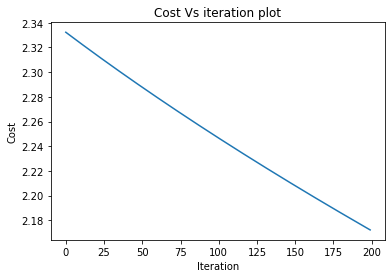

In [ ]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.title('Cost Vs iteration plot')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [ ]:
def accuracy(test_input, labels, parameters):
    forward_parameters = forward_propagation(test_input, parameters)
    h_out = forward_parameters['h4']   # containes propabilities with shape(10, 1)
    
    h_out = np.argmax(h_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(h_out == labels)*100
    
    return acc

In [ ]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 32.625 %
Accuracy of Test Dataset 31.96 %


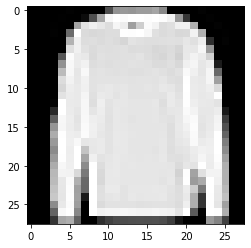

Our model says it is : 4


In [ ]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

forward_parameters = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = forward_parameters['h4']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])

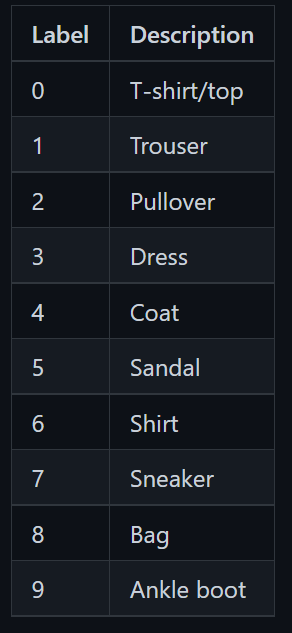